In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('/kaggle/input/sunspots/Sunspots.csv', usecols=[1,2], parse_dates=[0], index_col=0, squeeze=True)
data.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Name: Monthly Mean Total Sunspot Number, dtype: float64

In [42]:
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)

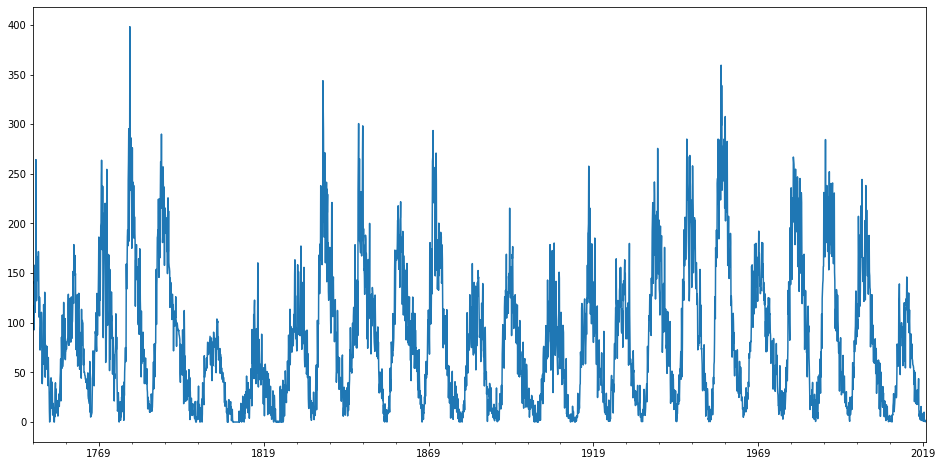

In [43]:
data.plot(figsize=(16, 8))

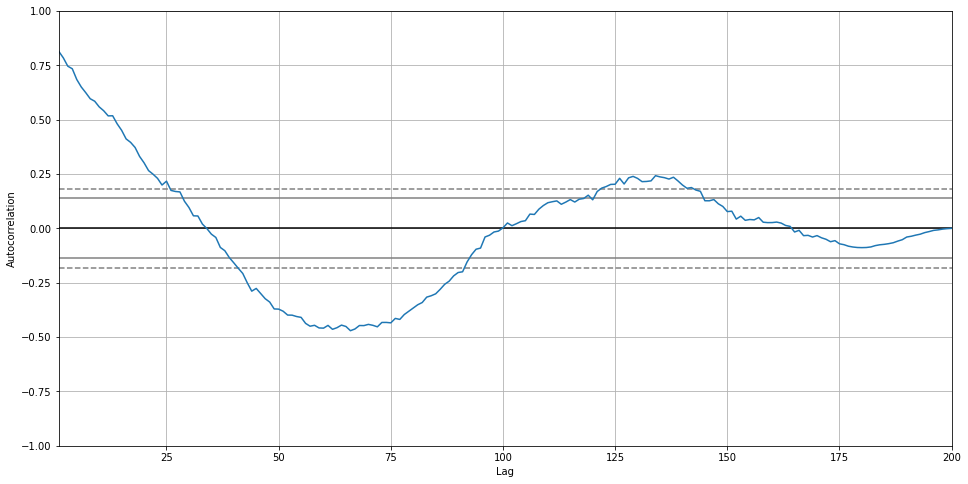

In [44]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(16, 8))
autocorrelation_plot(data[:200])

In [20]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data, order=(25,1,0), freq=data.index.inferred_freq)
model_fit = model.fit(disp=0)
print(model_fit.summary())

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      ARIMA Model Results                                      
Dep. Variable:     D.Monthly Mean Total Sunspot Number   No. Observations:                 3251
Model:                                 ARIMA(25, 1, 0)   Log Likelihood              -15038.442
Method:                                        css-mle   S.D. of innovations             24.698
Date:                                 Sat, 18 Apr 2020   AIC                          30130.883
Time:                                         19:00:34   BIC                          30295.224
Sample:                                     02-28-1749   HQIC                         30189.755
                                          - 12-31-2019                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const     

NameError: name 'DataFrame' is not defined

                 0
count  3251.000000
mean     -0.013335
std      24.708216
min    -109.097567
25%     -12.867923
50%      -0.433795
75%      12.469070
max     144.989273


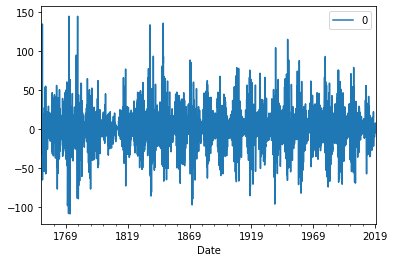

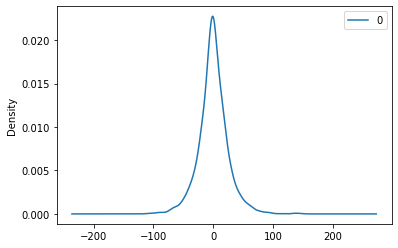

In [22]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

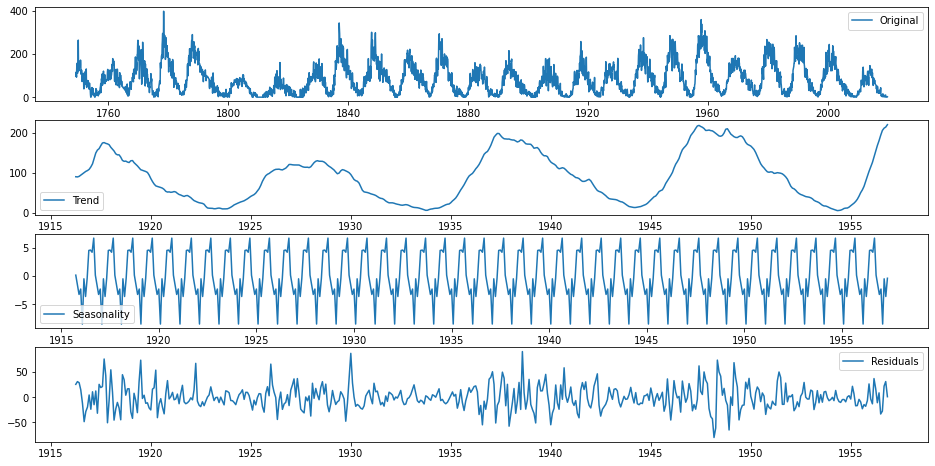

<Figure size 432x288 with 0 Axes>

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data[2000:2500])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(data[2000:2500], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()
plt.tight_layout()